Book 1  
Chapter 13 Fundamentals of NumPy
### 聊聊 `NumPy`

In [3]:
# 导入包
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from matplotlib import cm # cm 模块提供了许多预定义的颜色映射和相关方法
import os

if not os.path.isdir('Figures'):
    os.makedirs('Figures')

In [4]:
# 从列表中创建一维数组
arr1 = np.array([1, 2, 3, 4])
arr1

array([1, 2, 3, 4])

In [5]:
# 指定数组的数据类型
arr2 = np.array([1, 2, 3, 4], dtype=float)
arr2

array([1., 2., 3., 4.])

In [6]:
# 从元组中创建二维数组
arr3 = np.array([(1, 2, 3), (4, 5, 6)])
arr3

array([[1, 2, 3],
       [4, 5, 6]])

In [7]:
# 指定最小维度
arr4 = np.array([1, 2, 3, 4], ndmin=2)
arr4

array([[1, 2, 3, 4]])

### 自定义可视化函数

In [9]:
# 定义二维数组可视化函数
def visualize_2D(array, title, vmax, vmin):
    fig_width  = math.ceil(array.shape[1] * 0.5) # 用数组的列数计算图像宽度
    fig_height = math.ceil(array.shape[0] * 0.5) # 用数组的行数计算图像高度

    fig, ax = plt.subplots(figsize=(fig_width, fig_height))
    # 注意，seaborn.heatmap() 目前只能接受2D数组
    # 本书中，一维数组可视化时用圆圈
    # 可视化时，只有二维、三维数组用方块

    sns.heatmap(array,
                vmax=vmax,
                vmin=vmin,
                annot=True,        # 增加注释
                fmt='.0f',         # 注释数值的格式
                square=True,       # 热图方格为正方形
                cmap='RdYlBu_r',   # 指定色谱
                linewidths=.5,     # 方格线宽
                cbar=False,        # 不显示色谱条
                yticklabels=False, # 不显示纵轴标签
                xticklabels=False, # 不显示横轴标签
                ax=ax)             # 指定绘制热图的轴

    fig.savefig('Figures/'+title+'.svg', format='svg')

In [10]:
# 定义绘制一元数组可视化函数
def visualize_1D(array, title):
    fig, ax = plt.subplots()

    colors = cm.RdYlBu_r(np.linspace(0, 1, len(array)))

    for idx in range(len(array)):
        circle_idx = plt.Circle((idx, 0), radius=0.5, facecolor=colors[idx], edgecolor='w')
        # 在指定坐标 (idx, 0)，绘制半径为 0.5 的圆形
        ax.add_patch(circle_idx)
        # 在轴对象上添加圆形，这一步不可以省去，不然无法显示圆形对象
        ax.text(idx, 0, s=str(array[idx]),
                horizontalalignment='center',
                verticalalignment='center')

    ax.set_xlim(-0.6, 0.6+len(array))
    ax.set_ylim(-0.6, 0.6)
    ax.set_aspect('equal', adjustable='box')
    ax.axis('off')

    fig.savefig('Figures/'+title+'.svg', format='svg')

### 手动

#### 一维

In [13]:
a_1D = np.array([-3, -2, -1, 0, 1, 2, 3])
a_1D

array([-3, -2, -1,  0,  1,  2,  3])

In [14]:
a_1D.shape

(7,)

In [15]:
len(a_1D)

7

In [16]:
a_1D.ndim

1

In [17]:
a_1D.size

7

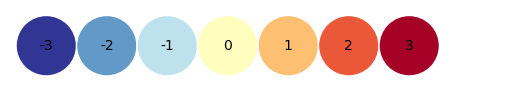

In [18]:
visualize_1D(a_1D, '手动，一维')

In [19]:
# 取出第一个元素
a_1D[0]

-3

In [20]:
# 取出最后一个元素
a_1D[-1]

3

#### 二维

In [22]:
a_2D = np.array([[-3, -2, -1],
                 [0, 1, 2]])
a_2D

array([[-3, -2, -1],
       [ 0,  1,  2]])

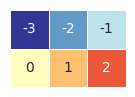

In [23]:
visualize_2D(a_2D, '手动，二维', 3, -3)

In [24]:
a_2D.shape

(2, 3)

In [25]:
a_2D.shape[0]
# 行数

2

In [26]:
a_2D.shape[1]
# 列数

3

In [27]:
a_2D.ndim

2

In [28]:
a_2D.size

6

In [29]:
len(a_2D)

2

#### 二维，行向量

In [31]:
# 定义二维数组，行向量(两层中括号)
a_row_vector = np.array([[-3, -2, -1, 0, 1, 2, 3]])
a_row_vector

array([[-3, -2, -1,  0,  1,  2,  3]])

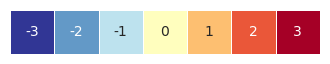

In [32]:
# 可视化
visualize_2D(a_row_vector, '手动，行向量', 3, -3)

In [33]:
a_row_vector.shape

(1, 7)

In [34]:
a_row_vector.ndim

2

In [35]:
len(a_row_vector)

1

In [36]:
a_row_vector.size

7

#### 二维，列向量

In [38]:
# 定义二维数组，列向量
a_col_vector = np.array([[-3], [-2], [-1], [0], [1], [2], [3]])
a_col_vector

array([[-3],
       [-2],
       [-1],
       [ 0],
       [ 1],
       [ 2],
       [ 3]])

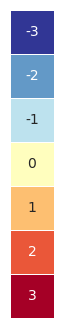

In [39]:
# 可视化
visualize_2D(a_col_vector, '手动，列向量', 3, -3)

In [40]:
a_col_vector.shape

(7, 1)

In [41]:
a_col_vector.ndim

2

In [42]:
len(a_col_vector)

7

In [43]:
a_col_vector.size

7

#### 三维

In [45]:
a_3D = np.array([[[-12, -11, -10, -9],
                  [-8,  -7,  -6,  -5],
                  [-4,  -3,  -2,  -1]],
                 [[0,   1,   2,   3],
                  [4,   5,   6,   7],
                  [8,   9,   10,  11]]])
a_3D

array([[[-12, -11, -10,  -9],
        [ -8,  -7,  -6,  -5],
        [ -4,  -3,  -2,  -1]],

       [[  0,   1,   2,   3],
        [  4,   5,   6,   7],
        [  8,   9,  10,  11]]])

In [46]:
a_3D.shape

(2, 3, 4)

In [47]:
a_3D.ndim

3

In [48]:
len(a_3D)

2

In [49]:
a_3D[0]

array([[-12, -11, -10,  -9],
       [ -8,  -7,  -6,  -5],
       [ -4,  -3,  -2,  -1]])

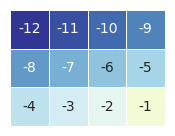

In [50]:
visualize_2D(a_3D[0], '手动，三维，第一页', 12, -12)

In [51]:
a_3D[0].shape

(3, 4)

In [52]:
a_3D[1]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

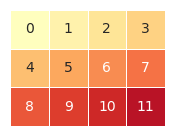

In [53]:
visualize_2D(a_3D[1], '手动，三维，第二页', 12, -12)

#### 三维，行向量

In [55]:
a_row_vector_3D = np.array([[[-3, -2, -1, 0, 1, 2, 3]]])
a_row_vector_3D

array([[[-3, -2, -1,  0,  1,  2,  3]]])

In [56]:
a_row_vector_3D.shape

(1, 1, 7)

In [57]:
a_row_vector_3D.ndim

3

### list 到数组

In [59]:
# 一维数组
list_1D = [-3, -2, -1, 0, 1, 2, 3]
list_1D

[-3, -2, -1, 0, 1, 2, 3]

In [60]:
array_1D = np.array(list_1D)
array_1D

array([-3, -2, -1,  0,  1,  2,  3])

In [61]:
array_1D.shape

(7,)

In [62]:
# 二维数组
list_2D = [[-3, -2, -1, 0, 1, 2, 3]]
list_2D

[[-3, -2, -1, 0, 1, 2, 3]]

In [63]:
array_2D = np.array(list_2D)
array_2D

array([[-3, -2, -1,  0,  1,  2,  3]])

In [64]:
array_2D.shape

(1, 7)

In [65]:
# 三维数组
list_3D = [[[-3, -2, -1, 0, 1, 2, 3]]]
list_3D

[[[-3, -2, -1, 0, 1, 2, 3]]]

In [66]:
array_3D = np.array(list_3D)
array_3D

array([[[-3, -2, -1,  0,  1,  2,  3]]])

In [67]:
array_3D.shape

(1, 1, 7)

### 数列

#### 使用 `numpy.arange()`

In [70]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [71]:
np.arange(5, dtype=float)

array([0., 1., 2., 3., 4.])

In [72]:
np.arange(10, 20)

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [73]:
np.arange(10, 20, 2)

array([10, 12, 14, 16, 18])

In [74]:
np.arange(10, 20, 2, dtype=float)

array([10., 12., 14., 16., 18.])

#### 使用 `numpy.linspace()`

In [76]:
np.linspace(0, 10, 21)

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

#### 使用 `numpy.logspace()`

In [78]:
np.logspace(0, 4, 5, base=10)

array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04])

In [79]:
np.logspace(0, 4, 5, base=2)

array([ 1.,  2.,  4.,  8., 16.])

In [80]:
[n**2 for n in np.arange(8)]

[0, 1, 4, 9, 16, 25, 36, 49]

### 网格数据

(21, 21)


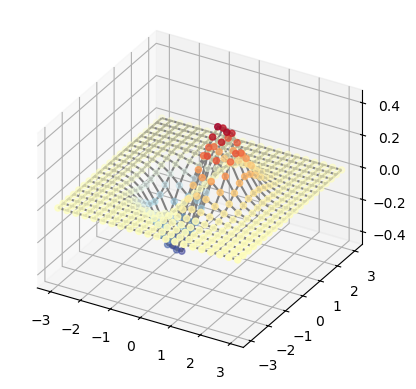

In [82]:
x1_array = np.linspace(-3, 3, 21)
x2_array = np.linspace(-3, 3, 21)

xx1, xx2 = np.meshgrid(x1_array, x2_array)
print(xx1.shape)

# 二元函数
ff = xx1 * np.exp(-xx1**2 - xx2**2)

# 可视化
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_wireframe(xx1, xx2, ff, rstride=1, cstride=1, color='grey')
ax.scatter(xx1, xx2, ff, c=ff, cmap='RdYlBu_r')

ax.set_proj_type('ortho')

plt.show()

In [83]:
xx1

array([[-3. , -2.7, -2.4, -2.1, -1.8, -1.5, -1.2, -0.9, -0.6, -0.3,  0. ,
         0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ],
       [-3. , -2.7, -2.4, -2.1, -1.8, -1.5, -1.2, -0.9, -0.6, -0.3,  0. ,
         0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ],
       [-3. , -2.7, -2.4, -2.1, -1.8, -1.5, -1.2, -0.9, -0.6, -0.3,  0. ,
         0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ],
       [-3. , -2.7, -2.4, -2.1, -1.8, -1.5, -1.2, -0.9, -0.6, -0.3,  0. ,
         0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ],
       [-3. , -2.7, -2.4, -2.1, -1.8, -1.5, -1.2, -0.9, -0.6, -0.3,  0. ,
         0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ],
       [-3. , -2.7, -2.4, -2.1, -1.8, -1.5, -1.2, -0.9, -0.6, -0.3,  0. ,
         0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ],
       [-3. , -2.7, -2.4, -2.1, -1.8, -1.5, -1.2, -0.9, -0.6, -0.3,  0. ,
         0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ],

In [84]:
xx1.shape

(21, 21)

In [85]:
xx1.ndim

2

In [86]:
xx2

array([[-3. , -3. , -3. , -3. , -3. , -3. , -3. , -3. , -3. , -3. , -3. ,
        -3. , -3. , -3. , -3. , -3. , -3. , -3. , -3. , -3. , -3. ],
       [-2.7, -2.7, -2.7, -2.7, -2.7, -2.7, -2.7, -2.7, -2.7, -2.7, -2.7,
        -2.7, -2.7, -2.7, -2.7, -2.7, -2.7, -2.7, -2.7, -2.7, -2.7],
       [-2.4, -2.4, -2.4, -2.4, -2.4, -2.4, -2.4, -2.4, -2.4, -2.4, -2.4,
        -2.4, -2.4, -2.4, -2.4, -2.4, -2.4, -2.4, -2.4, -2.4, -2.4],
       [-2.1, -2.1, -2.1, -2.1, -2.1, -2.1, -2.1, -2.1, -2.1, -2.1, -2.1,
        -2.1, -2.1, -2.1, -2.1, -2.1, -2.1, -2.1, -2.1, -2.1, -2.1],
       [-1.8, -1.8, -1.8, -1.8, -1.8, -1.8, -1.8, -1.8, -1.8, -1.8, -1.8,
        -1.8, -1.8, -1.8, -1.8, -1.8, -1.8, -1.8, -1.8, -1.8, -1.8],
       [-1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5,
        -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5, -1.5],
       [-1.2, -1.2, -1.2, -1.2, -1.2, -1.2, -1.2, -1.2, -1.2, -1.2, -1.2,
        -1.2, -1.2, -1.2, -1.2, -1.2, -1.2, -1.2, -1.2, -1.2, -1.2],

In [87]:
xxx1, xxx2, xxx3 = np.meshgrid(np.arange(13), np.arange(13), np.arange(13))

In [88]:
xxx1

array([[[ 0,  0,  0, ...,  0,  0,  0],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 2,  2,  2, ...,  2,  2,  2],
        ...,
        [10, 10, 10, ..., 10, 10, 10],
        [11, 11, 11, ..., 11, 11, 11],
        [12, 12, 12, ..., 12, 12, 12]],

       [[ 0,  0,  0, ...,  0,  0,  0],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 2,  2,  2, ...,  2,  2,  2],
        ...,
        [10, 10, 10, ..., 10, 10, 10],
        [11, 11, 11, ..., 11, 11, 11],
        [12, 12, 12, ..., 12, 12, 12]],

       [[ 0,  0,  0, ...,  0,  0,  0],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 2,  2,  2, ...,  2,  2,  2],
        ...,
        [10, 10, 10, ..., 10, 10, 10],
        [11, 11, 11, ..., 11, 11, 11],
        [12, 12, 12, ..., 12, 12, 12]],

       ...,

       [[ 0,  0,  0, ...,  0,  0,  0],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 2,  2,  2, ...,  2,  2,  2],
        ...,
        [10, 10, 10, ..., 10, 10, 10],
        [11, 11, 11, ..., 11, 11, 11],
        [12, 12, 12, ..., 12, 12

In [89]:
xxx1.shape

(13, 13, 13)

In [90]:
xxx1.ndim

3

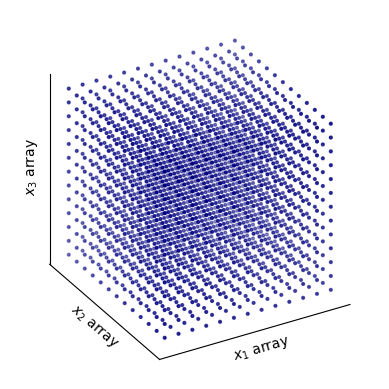

In [91]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(xxx1, xxx2, xxx3, s=4, c='navy')

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xlabel('$x_1$ array')
ax.set_ylabel('$x_2$ array')
ax.set_zlabel('$x_3$ array')
ax.xaxis.labelpad=-13
ax.yaxis.labelpad=-13
ax.zaxis.labelpad=-13


ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))



ax.set_proj_type('ortho')
ax.view_init(elev=30, azim=-120)
ax.set_aspect('equal')

ax.grid(False)

### 特殊矩阵

In [93]:
# numpy.empty(): 创建一个指定大小、未初始化的数组
np.empty([4, 4])

array([[ 5.41142084,  1.56214264,  2.70571042, -2.40571042],
       [-3.12428528,  2.70571042,  4.68642792, -4.38642792],
       [ 0.        ,  5.41142084, -3.12428528,  3.42428528],
       [ 0.        ,  0.        ,  0.        ,  0.05      ]])

In [94]:
np.empty(4)

array([-133.2,  -42.8,  506.8,  437.2])

In [95]:
# numpy.empty_like(): 创建与给定数组具有相同形状和数据类型的未初始化数组的函数
A = np.array([[1, 2, 3],
              [4, 5, 6]])
np.empty_like(A)

array([[-4617315517961601024,  4623437598705057792, -4617315517961601024],
       [ 4623437598705057792, -4617315517961601024,  4623437598705057792]])

In [96]:
# numpy.eye(): 创建一个二维数组，表示单位矩阵
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [97]:
# numpy.full(): 创建一个指定大小和给定值的数组
np.full((3, 3), np.inf)

array([[inf, inf, inf],
       [inf, inf, inf],
       [inf, inf, inf]])

In [98]:
# numpy.full_like(): 创建与给定数组具有相同形状和数据类型，且所有元素都是指定值
A = np.array([[1, 2, 3],
              [4, 5, 6]])
np.full_like(A, 100)

array([[100, 100, 100],
       [100, 100, 100]])

In [99]:
# numpy.ones(): 创建一个指定大小的全1数组
np.ones(5)

array([1., 1., 1., 1., 1.])

In [100]:
np.ones((5, 5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [101]:
# numpy.ones_like(): 创建与给定数组具有相同形状和数据类型，且所有元素都是1的数组
A = np.array([[1, 2, 3],
              [4, 5, 6]])
np.ones_like(A)

array([[1, 1, 1],
       [1, 1, 1]])

In [102]:
# numpy.zeros(): 创建一个指定大小的全0数组
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [103]:
np.zeros((5, 5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [104]:
# numpy.zeros_like(): 创建与给定数组具有相同形状和数据类型，且所有元素都是0的数组
A = np.array([[1, 2, 3],
              [4, 5, 6]])
np.zeros_like(A)

array([[0, 0, 0],
       [0, 0, 0]])

### 随机数

#### 二元连续均匀随机数

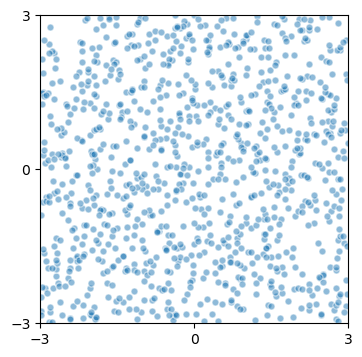

In [107]:
# 生成随机数，服从连续均匀分布
num = 1000
X_uniform = np.random.uniform(low=-3, high=3, size=(num, 2))

fig, ax = plt.subplots(figsize=(4, 4))

ax.scatter(X_uniform[:, 0],  # 散点横轴坐标
           X_uniform[:, 1],  # 散点纵轴坐标
           s=100,            # 散点大小
           marker='.',       # 散点 marker 样式
           alpha=0.5,        # 透明度
           edgecolors='w')   # 散点边缘颜色

ax.set_aspect('equal', adjustable='box')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_xticks((-3, 0, 3))
ax.set_yticks((-3, 0, 3))

fig.savefig('Figures/二元连续均匀随机数.svg', format='svg')

#### 二元正态分布随机数

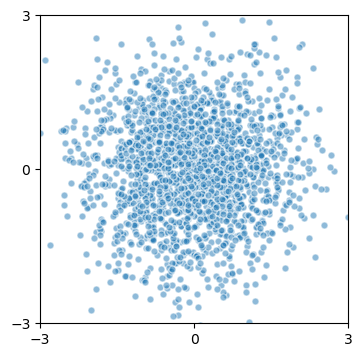

In [109]:
# 生成随机数，服从二元高斯分布
num = 2000

mu = np.array([0, 0])        # 质心
rho = 0                      # 相关性系数
Sigma = np.array([[1, rho],
                  [rho, 1]]) # 协方差矩阵

X_binormal = np.random.multivariate_normal(mu, Sigma, size=num)

fig, ax = plt.subplots(figsize=(4, 4))

ax.scatter(X_binormal[:, 0],
           X_binormal[:, 1],
           s=100,
           marker='.',
           alpha=0.5,
           edgecolors='w')

ax.set_aspect('equal', adjustable='box')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_xticks((-3, 0, 3))
ax.set_yticks((-3, 0, 3))

fig.savefig('Figures/二元正态分布随机数.svg', format='svg')

### CSV 文件导出、导入

<Axes: >

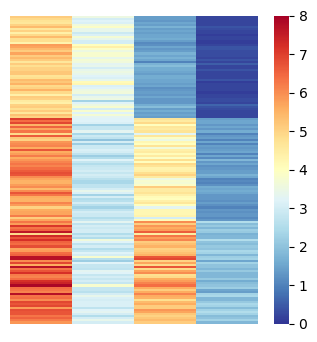

In [111]:
from sklearn.datasets import load_iris
from numpy import genfromtxt

# 导入鸢尾花数据
iris = load_iris()

# 将 numpy array 存成 CSV 文件
np.savetxt('Iris_data.csv', iris.data, delimiter=',')

# 将 CSV 文件读入存成 numpy array
Iris_Data_array = genfromtxt('Iris_data.csv', delimiter=',')

# 可视化
fig, ax = plt.subplots(figsize=(4, 4))

sns.heatmap(Iris_Data_array, # 鸢尾花数据数组
            cmap='RdYlBu_r', # 指定色谱
            ax=ax,           # 指定轴
            vmax=8,          # 色谱最大值
            vmin=0,          # 色谱最小值
            xticklabels=[],  # 不显示横轴标签
            yticklabels=[],  # 不显示纵轴标签
            cbar=True)       # 显示色谱条

In [112]:
Iris_Data_array

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

### 推荐阅读

NumPy 最权威的综述，请参考：  
https://www.nature.com/articles/s41586-020-2649-2  
MATLAB 用户，使用 NumPy 之前请先阅读：  
https://numpy.org/doc/stable/user/numpy-for-matlab-users.html  
更多 NumPy 练习题，大家可以参考：  
https://github.com/rougier/numpy-100/blob/master/100_Numpy_exercises_with_solutions.md  
NumPy 中的英文术语：  
https://numpy.org/doc/stable/glossary.html

In [115]:
# Repo: https://github.com/Visualize-ML
# Book 1 Python for Beginners  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023